# Probability and Statistics Notes

## Statistics Workflow Overview

1. Getting **good** data
2. Understand how the data is **structured** and **measured**
3. **Organize** the data in **comprehensible** forms to find patterns
4. **Visualize** the patterns

## Information

**Dataset**

The data set is about basketball players in WNBA (Women's National Basketball Association), and contains general information about players, along with their metrics for the season 2016-2017. The data set was put together by Thomas De Jonghe, and can be downloaded from [Kaggle](https://www.kaggle.com/jinxbe/wnba-player-stats-2017).

In [8]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# plots are displayed inline
%matplotlib inline 

In [2]:
!ls

probability_and_statistics_notes.ipynb	wnba-player-stats-2017.csv


In [4]:
wnba = pd.read_csv('wnba-player-stats-2017.csv')

In [5]:
wnba.shape

(143, 32)

In [6]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

---

## Sampling

**Definitions**

- **Population**: Set of _all_ individuals relevant to a particular statistical question
- **Sample**: A smaller group selected from a population
- **Sampling Error**: The difference between population metrics and sample metrics
- **Parameter**: A metric specific to a population
- **Statistic**: A metric specific to a sample

In [7]:
# Sampling Error

parameter = wnba['Games Played'].max()
print('Parameter:', parameter)

sample = wnba['Games Played'].sample(30, random_state = 1) # sample 30 players randomly
statistic = sample.max()
print('Statistic:', statistic)

sampling_error = parameter - statistic
print('Sampling error:', sampling_error)

Parameter: 32
Statistic: 30
Sampling error: 2


### Simple Random Sampling

When we sample, we want our samples to be **representative** of their corresponding populations. The more representative, the smaller the sampling error. The less representative, the larger the sampling error.

- **Simple Random Sampling**: A method of random sampling where random numbers are generated and used to select a few sample units from the population

_Notes_

The `random_state` parameter makes the generation of random numbers predictable. `Series.sample()` uses a [pseudorandom number generator](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) under the hood. A pseudorandom number generator uses an initial value to generate a sequence of numbers that has properties similar to those of a sequence that is truly random. `random_state` specifies the initial value used by the pseudorandom number generator.

[]

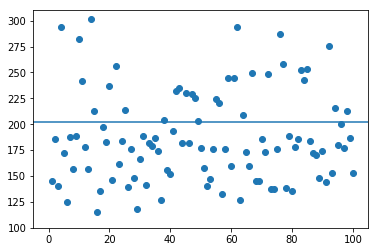

In [17]:
sample_means = []
population_mean = wnba['PTS'].mean()

# take 100 samples sampling 10 values from the total points column and taking the mean
for i in range(100):
    sample = wnba['PTS'].sample(10, random_state=i)
    sample_means.append(sample.mean())

plt.scatter(range(1, 101), sample_means)
plt.axhline(population_mean)
plt.xlim(-5, 105)
plt.ylim(100, 310)
plt.plot()

[]

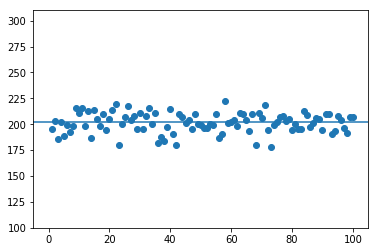

In [18]:
# sample size of 100

sample_size = 100
sample_means = []
population_mean = wnba['PTS'].mean()

# take 100 samples sampling 10 values from the total points column and taking the mean
for i in range(100):
    sample = wnba['PTS'].sample(sample_size, random_state=i)
    sample_means.append(sample.mean())

plt.scatter(range(1, 101), sample_means)
plt.axhline(population_mean)
plt.xlim(-5, 105)
plt.ylim(100, 310)
plt.plot()

**Observations**:

We observe the sample means vary a lot around the population mean. We also observe the larger the sample size, the more representative the samples are!

### Stratified Sampling

_Simple Random Sampling_'s random nature results in it leaving out certain population individuals.

**Stratified Sampling**: A sampling method which ensures observations for all categories of interest are captured. Each _stratified group_ is known as a **stratum**

In [21]:
new_wnba = wnba.copy()

In [22]:
new_wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

In [25]:
# stratified sampling using player position

new_wnba['Points Per Game'] = new_wnba['PTS'] / new_wnba['Games Played']

positions = {}
for pos in new_wnba['Pos'].unique():
    positions[pos] = new_wnba[new_wnba['Pos'] == pos]

# Get mean points per game for each stratum
points_per_position = {}
for position, stratum in positions.items():
    sample = stratum.sample(10, random_state=0)
    points_per_position[position] = sample['Points Per Game'].mean()
    
print('Points Per Position:', points_per_position)
# get position with most points
position_most_points = max(points_per_position, key=points_per_position.get)
print('\nPosition with most points:', position_most_points)

Points Per Position: {'F': 8.702175158545568, 'G/F': 6.817264935760487, 'G': 7.092926195632343, 'C': 9.833761394334251, 'F/C': 9.059118773946361}

Position with most points: C


### Proportional Stratified Sampling

Earlier we computed the mean number of _total points_ a player scores in a season by performing simple random sampling 100 times. The number of total points is influenced by the number of games played:

In [26]:
print(wnba['Games Played'].value_counts(bins = 3, normalize=True) * 100)

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64


Almost 73% of players had more than 23 games. This group of players would skew the mean of the total games.

When we sample randomly, we can end up with a sample where the proportions are different than the population. This may cause our sample metric to underestimate or overestimate the population metric.

**Proportional Stratified Sampling**: Stratify data and sample randomly from each stratum a _proportional_ number of observations.

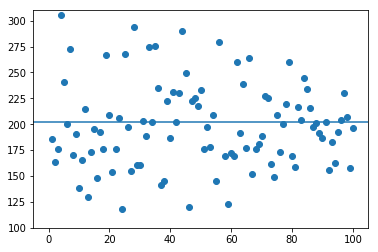

In [28]:
# stratify by games played

under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_23 = wnba[wnba['Games Played'] > 22]

# calculate mean via stratified sampling
proportional_sampling_means = []
for i in range(100):
    sample_under_12 = under_12.sample(1, random_state=i)
    sample_btw_13_22 = btw_13_22.sample(2, random_state=i)
    sample_over_23 = over_23.sample(7, random_state=i)
    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_23])
    proportional_sampling_means.append(final_sample['PTS'].mean())

# plot
plt.scatter(range(1,101), proportional_sampling_means)
plt.xlim(-5, 105)
plt.ylim(100, 310)
plt.axhline(wnba['PTS'].mean())

**Observations**:

This approach did not result in any better result than the simple random sampling approach. This is due to a poor choice of strata. We used number of games played to stratify the data. Since a player is considered to have a played a game whether they played for the whole game or a few minutes, this isn't the right metric to use.


_Guidelines for choosing good strata_:

1. Minimize the variability within each stratum.
2. Maximize the variability between strata.
3. The stratification criterion should be strongly correlated with the property you're trying to measure.


In [30]:
print(wnba['MIN'].value_counts(bins = 3, normalize = True) * 100)

(347.333, 682.667]    34.965035
(10.993, 347.333]     33.566434
(682.667, 1018.0]     31.468531
Name: MIN, dtype: float64


Let's use number of minutes played to stratify the data:

[]

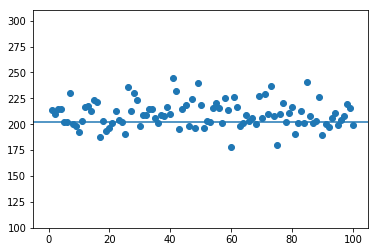

In [34]:
# stratify by minutes played

under_348 = wnba[wnba['MIN'] <= 348]
btw_349_683 = wnba[(wnba['MIN'] > 348) & (wnba['MIN'] <= 683)]
over_683 = wnba[wnba['MIN'] > 683]

# calculate proportional sampling mean
proportional_sampling_means = []
for i in range(100):
    sample_under_348 = under_348.sample(10, random_state=i)
    sample_btw_349_683 = btw_349_683.sample(10, random_state=i)
    sample_over_683 = over_683.sample(10, random_state=i)
    final_sample = pd.concat([sample_under_348, sample_btw_349_683, sample_over_683])
    proportional_sampling_means.append(final_sample['PTS'].mean())

# plot
plt.scatter(range(1, 101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())
plt.xlim(-5, 105)
plt.ylim(100, 310)
plt.plot()

**Observations**:

Using the right strata choice definitely plays a large role in reducing the variance between the sample metrics and the population metric.

### Cluster Sampling

It is common in the data science workflow that data comes from different sources and collecting it is either too time consuming or close to impossible.

**Cluster Sampling**: A sampling method where each data source is kept separate and a few are randomly picked to collect data from. Each picked **cluster** is sampled individually.

In our case, we can treat each team as its own cluster:

In [36]:
print(wnba['Team'].unique())

['DAL' 'LA' 'CON' 'SAN' 'MIN' 'SEA' 'PHO' 'CHI' 'WAS' 'NY' 'ATL' 'IND']


In [64]:
# simulating cluster sampling via randomly picking 4 clusters

four_team_cluster = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

sample = pd.DataFrame()

for team in four_team_cluster:
    team_data = wnba[wnba['Team'] == team]
    sample = sample.append(team_data)

# find sampling errors
columns = ['Height', 'Age', 'BMI', 'PTS']

for col in columns:
    sampling_error = wnba[col].mean() - sample[col].mean()
    print("The sampling error for {0:<6}: {1:.2f}".format(col, sampling_error))

The sampling error for Height: -0.06
The sampling error for Age   : -1.40
The sampling error for BMI   : 0.23
The sampling error for PTS   : -27.80


---

### Descriptive and Inferential Statistics

When we are doing statistics in practice, our goal is either to:

- describe a sample or a population
- use a sample to draw conclusions about the population it belongs to

**Descriptive Statistics**: When we describe a sample or a population via measuring averages, proportions, and other metrics; by visualizing properties of the data through graphs

**Inferential statistics**: When we try to use a sample to draw conclusions about a population

---

## Variables in Statistics

**Variables**: Properties in data sets with varying values. E.g. all the properties described in the WNBA dataset are variables.

**Quantitative variable**: A variable the describes _how much there is of something_.

**Qualitative/Categorical variable**: A variable that describes _what_ or _how_ something is.


|           -                            | Quantitative Variables | Qualitative Variables |
|:--------------------------------------:| ---------------------- | --------------------- |
| Describe **quantities**                |          YES           |          **NO**       |
| Describe **qualities**                 |          **NO**        |          YES          |
| Use **numbers**                        |          YES           |          YES          |
| Numbers are <br/>**actual quantities** |          YES           |          **NO**       |
| Use **words**                          |          YES           |          YES          |
| Words express <br/>a **quantity**      |          YES           |          **NO**       |

In [65]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [67]:
# quantitative or qualitative variables

variables = {'Name': 'qualitative', 'Team': 'qualitative', 'Pos': 'qualitative', 'Height': 'quantitative', 'BMI': 'quantitative',
             'Birth_Place': 'qualitative', 'Birthdate': 'quantitative', 'Age': 'quantitative', 'College': 'qualitative', 'Experience': 'quantitative',
             'Games Played': 'quantitative', 'MIN': 'quantitative', 'FGM': 'quantitative', 'FGA': 'quantitative',
             '3PA': 'quantitative', 'FTM': 'quantitative', 'FTA': 'quantitative', 'FT%': 'quantitative', 'OREB': 'quantitative', 'DREB': 'quantitative',
             'REB': 'quantitative', 'AST': 'quantitative', 'PTS': 'quantitative'}

variables

{'Name': 'qualitative',
 'Team': 'qualitative',
 'Pos': 'qualitative',
 'Height': 'quantitative',
 'BMI': 'quantitative',
 'Birth_Place': 'qualitative',
 'Birthdate': 'quantitative',
 'Age': 'quantitative',
 'College': 'qualitative',
 'Experience': 'quantitative',
 'Games Played': 'quantitative',
 'MIN': 'quantitative',
 'FGM': 'quantitative',
 'FGA': 'quantitative',
 '3PA': 'quantitative',
 'FTM': 'quantitative',
 'FTA': 'quantitative',
 'FT%': 'quantitative',
 'OREB': 'quantitative',
 'DREB': 'quantitative',
 'REB': 'quantitative',
 'AST': 'quantitative',
 'PTS': 'quantitative'}

### Scales of Measurement

**Scales of measurement**: The system of rules that defines how each variable is measured.

The characteristics of each scale pivot around 3 main questions:

1. Can we tell whether two individuals are different?
2. Can we tell the direction of the difference?
3. Can we tell the size of the difference?


_Types_:

- **Nominal**: A scale where we can tell whether two individuals are different
- **Ordinal**: A scale where we can tell whether two individuals are different along with the direction of the difference, but not the size of the difference
- **Interval**: A scale where we can tell whether two individuals are different, the direction of the difference and the size of the difference
- **Ratio**: A scale where we can tell whether two individuals are different, the direction of the difference and the size of the difference


_Ratio vs Interval_

- On a ratio scale, a zero point means no quantity. E.g. `Weight` variable is measured on a ratio scale, so 0 grams indicates absence of weight
- On an interval scale, zero point doesn't indicate the absence of a quantity. E.g. if we calculate `Weight deviation`, a value of 0 would indicate the player has the same weight as the average of the group
- On a ratio scale, the difference can be quantified in two ways:
    - measure the _distance_ via subtraction
    - measure via _ratios_


|           -                                        | Interval | Ratio  |
|:--------------------------------------------------:| -------- | -----  |
| Well-defined **intervals**                         | YES      | YES    |
| **0 point** indicates <br/>**absence of quantity** | **No**   | YES    |
| Difference measured <br/>in **distance**           | YES      | YES    |
| Difference  measured <br/>in **ratios**            | **No**   | YES    |


**Summary**:

|           -                             | Nominal | Ordinal | Interval | Ratio  |
|:---------------------------------------:| ------- | ------- | -------- | -----  |
| Whether 2 individuals are **different** | YES     | YES     | YES      | YES    |
| **Direction** of the difference         | **NO**  | YES     | YES      | YES    |
| **Size** of the difference              | **NO**  | **NO**  | YES      | YES    |
| Measure **quantitative** variables      | **NO**  | YES     | YES      | YES    |
| Measure **qualitative** variables       | YES     | **NO**  | **NO**   | **NO** |


In [68]:
# Variable Scales of Measurements

nominal_scale = ['Name', 'Team', 'Pos', 'Birth_Place', 'College']

interval = sorted(['Weight_deviation', 'Birthdate'])

ratio = sorted(['Height', 'Weight', 'BMI', 'Age', 'Experience', 'Games Played', 
                'MIN', 'FGM', 'FGA', '15:00', '3PA', 'FTM', 'FTA', 'OREB', 'DREB', 
                'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3', 'FG%', '3P%', 'FT%'])


### Discrete and Continuous Variables

**Discrete**: A variable where there is no possible intermediate value between any two adjacent values

**Continuous**: A variable where there is an infinity of values between any two values

In [69]:
ratio_interval_only = {'Height':'continuous', 'Weight': 'continuous', 'BMI': 'continuous', 'Age': 'continuous', 'Games Played': 'discrete', 'MIN': 'continuous', 'FGM': 'discrete',
                       'FGA': 'discrete', 'FG%': 'continuous', '3PA': 'discrete', '3P%': 'continuous', 'FTM': 'discrete', 'FTA': 'discrete', 'FT%': 'continuous',
                       'OREB': 'discrete', 'DREB': 'discrete', 'REB': 'discrete', 'AST': 'discrete', 'STL': 'discrete', 'BLK': 'discrete', 'TO': 'discrete',
                       'PTS': 'discrete', 'DD2': 'discrete', 'TD3': 'discrete', 'Weight_deviation': 'continuous'}

ratio_interval_only

{'Height': 'continuous',
 'Weight': 'continuous',
 'BMI': 'continuous',
 'Age': 'continuous',
 'Games Played': 'discrete',
 'MIN': 'continuous',
 'FGM': 'discrete',
 'FGA': 'discrete',
 'FG%': 'continuous',
 '3PA': 'discrete',
 '3P%': 'continuous',
 'FTM': 'discrete',
 'FTA': 'discrete',
 'FT%': 'continuous',
 'OREB': 'discrete',
 'DREB': 'discrete',
 'REB': 'discrete',
 'AST': 'discrete',
 'STL': 'discrete',
 'BLK': 'discrete',
 'TO': 'discrete',
 'PTS': 'discrete',
 'DD2': 'discrete',
 'TD3': 'discrete',
 'Weight_deviation': 'continuous'}

---

## Frequency Distributions

**Frequency distribution table**: A table which shows how _frequencies are distributed_, thus serving as a way to simplify the data for us.

Use the [`Series.value_counts()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html?highlight=value_counts#pandas.Series.value_counts) method to generate a frequency distribution table.

In [71]:
print('Position Frequency Table:')
print(wnba['Pos'].value_counts())

print('\nHeight Frequency Table:')
print(wnba['Height'].value_counts())

Position Frequency Table:
G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

Height Frequency Table:
188    20
193    18
175    16
185    15
191    11
183    11
173    11
196     9
178     8
180     7
170     6
198     5
201     2
168     2
206     1
165     1
Name: Height, dtype: int64


### Sorting Frequency Distribution Tables

In [72]:
# sort the table by index

print('Age Ascending Frequency Table:')
print(wnba['Age'].value_counts().sort_index())

print('\nAge Descending Frequency Table:')
print(wnba['Age'].value_counts().sort_index(ascending=False))

Age Ascending Frequency Table:
21     2
22    10
23    15
24    16
25    15
26    12
27    13
28    14
29     8
30     9
31     8
32     8
33     3
34     5
35     4
36     1
Name: Age, dtype: int64

Age Descending Frequency Table:
36     1
35     4
34     5
33     3
32     8
31     8
30     9
29     8
28    14
27    13
26    12
25    15
24    16
23    15
22    10
21     2
Name: Age, dtype: int64


**Observations**:

- Most players are 22 - 28 years old
- No one is younger than 21 years old
- There are a few players older than 30 years old

### Sorting Table for Ordinal Values

Use `iloc[]` to re-order by position.

In [73]:
second_wnba = wnba.copy()

In [76]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'
    
second_wnba['PTS_ordinal_scale'] = second_wnba.apply(make_pts_ordinal, axis = 1)

print('Frequency table ordered by unique values in descending order:')

pts_ordinal_desc = second_wnba['PTS_ordinal_scale'].value_counts().iloc[[4, 3, 0, 2, 1, 5]]
print(pts_ordinal_desc)

Frequency table ordered by unique values in descending order:
much more than average      13
more than average           21
average number of points    45
many, but below average     25
few points                  27
very few points             12
Name: PTS_ordinal_scale, dtype: int64


### Proportions and Percentages

When analyzing distributions, we are often interested in answering questions about **proportions** and **percentages**.

- What _proportion_ of players are guards?
- What _percentage_ of players are centers?
- What _percentage_ of players have mixed positions?

